## EDA And Feature Engineering Of Google Play Store Dataset

1) Problem statement.
Today, 1.85 million different apps are available for users to download. Android users have even more from which to choose, with 2.56 million available through the Google Play Store. These apps have come to play a huge role in the way we live our lives today. Our Objective is to find the Most Popular Category, find the App with largest number of installs , the App with largest size etc.
2) Data Collection.

The data consists of 20 column and 10841 rows.

### Steps We Are Going to Follow
1. Data Clearning
2. Exploratory Data Analysis
3. Featur eEngineering

In [197]:
# Importing necessary libraries for data analysis and visualization
import pandas as pd          # Used for data manipulation and analysis (DataFrames)
import numpy as np           # Used for numerical operations
import matplotlib.pyplot as plt  # Used for creating static visualizations
import seaborn as sns        # Built on top of matplotlib, used for more attractive and informative visualizations
import warnings              # Used to handle or suppress warning messages

# Ignore warning messages to keep the output clean
warnings.filterwarnings("ignore")

# Jupyter Notebook magic command to display plots inline, directly below the code cell
%matplotlib inline


In [198]:
# Load the dataset
df = pd.read_csv('playstore.csv')

# Drop unnecessary index columns if they exist
columns_to_drop = ['Unnamed: 0', 'Unnamed: 0.1']
df.drop(columns=[col for col in columns_to_drop if col in df.columns], inplace=True)

# Display the first few rows of the cleaned dataset
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [199]:
df.shape

(10841, 13)

In [200]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [201]:
##summary of the dataset
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [202]:
##Missing Values
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

## Insights and observation
The dataset has missing values

In [203]:
df.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up


## Data Cleaning

In [204]:
# Display all the unique values present in the 'Reviews' column
# Useful for checking data types, outliers, or anomalies (e.g., '3.0M' instead of numeric)
df['Reviews'].unique()


array(['159', '967', '87510', ..., '603', '1195', '398307'], dtype=object)

In [205]:
# df['Reviews'].astype(int)

In [206]:
# Count how many entries in the 'Reviews' column contain only numeric characters (i.e., are fully numeric strings)
# This helps identify how many values can be safely converted to numbers (integers/floats)
df['Reviews'].str.isnumeric().sum()
# total 10841 entries but 1 is non numeric


10840

In [207]:
# Filter and display rows where the 'Reviews' column contains non-numeric values
# The tilde (~) negates the condition, so this shows entries like '3.5M', '1k', or other malformed data
df[~df['Reviews'].str.isnumeric()]


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [208]:
# Create a copy of the original DataFrame and store it in 'df_copy'
# This ensures the original 'df' remains unchanged during further data cleaning or transformation
df_copy = df.copy()


In [209]:
# Drop the row at index 10472 from the copied DataFrame
# This is likely done to remove an invalid or corrupted record (e.g., non-numeric 'Reviews' or missing values)
df_copy = df_copy.drop(df_copy.index[10472])


In [210]:
df_copy[~df_copy['Reviews'].str.isnumeric()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [211]:
## Convert Review Datatype to int
df_copy['Reviews']=df_copy['Reviews'].astype(int)

In [212]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int64  
 4   Size            10840 non-null  object 
 5   Installs        10840 non-null  object 
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 1.2+ MB


In [213]:
df_copy['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [214]:
# 19000K==19M

In [215]:
# checking missing values
df_copy['Size'].isnull().sum()

0

In [216]:
# Replace 'M' with '000' to convert sizes like '23M' to '23000' (assuming 'M' = MB and treating as KB)
df_copy['Size'] = df_copy['Size'].str.replace('M', '000')

# Remove 'k' from values like '12k' to convert them to '12' (assuming already in KB)
df_copy['Size'] = df_copy['Size'].str.replace('k', '')

# Replace the string 'Varies with device' with NaN, as it's not a numerical value
df_copy['Size'] = df_copy['Size'].replace('Varies with device', np.nan)

# Convert the cleaned 'Size' column from string to float for numerical analysis
df_copy['Size'] = df_copy['Size'].astype(float)


In [217]:
df_copy['Size']

0        19000.0
1        14000.0
2            8.7
3        25000.0
4            2.8
          ...   
10836    53000.0
10837        3.6
10838        9.5
10839        NaN
10840    19000.0
Name: Size, Length: 10840, dtype: float64

In [218]:
df_copy['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

In [219]:
df_copy['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [220]:
# Remove characters '+', ',', and '$' from 'Installs' and 'Price' columns to clean numeric data stored as strings
chars_to_remove = ['+', ',', '$']
cols_to_clean = ['Installs', 'Price']

for col in cols_to_clean:
    for char in chars_to_remove:
        df_copy[col] = df_copy[col].str.replace(char, '')


In [221]:
df_copy['Price'].unique()

array(['0', '4.99', '3.99', '6.99', '1.49', '2.99', '7.99', '5.99',
       '3.49', '1.99', '9.99', '7.49', '0.99', '9.00', '5.49', '10.00',
       '24.99', '11.99', '79.99', '16.99', '14.99', '1.00', '29.99',
       '12.99', '2.49', '10.99', '1.50', '19.99', '15.99', '33.99',
       '74.99', '39.99', '3.95', '4.49', '1.70', '8.99', '2.00', '3.88',
       '25.99', '399.99', '17.99', '400.00', '3.02', '1.76', '4.84',
       '4.77', '1.61', '2.50', '1.59', '6.49', '1.29', '5.00', '13.99',
       '299.99', '379.99', '37.99', '18.99', '389.99', '19.90', '8.49',
       '1.75', '14.00', '4.85', '46.99', '109.99', '154.99', '3.08',
       '2.59', '4.80', '1.96', '19.40', '3.90', '4.59', '15.46', '3.04',
       '4.29', '2.60', '3.28', '4.60', '28.99', '2.95', '2.90', '1.97',
       '200.00', '89.99', '2.56', '30.99', '3.61', '394.99', '1.26',
       '1.20', '1.04'], dtype=object)

In [222]:
df_copy['Installs'].unique()

array(['10000', '500000', '5000000', '50000000', '100000', '50000',
       '1000000', '10000000', '5000', '100000000', '1000000000', '1000',
       '500000000', '50', '100', '500', '10', '1', '5', '0'], dtype=object)

In [223]:
df_copy['Installs']=df_copy['Installs'].astype('int')
df_copy['Price']=df_copy['Price'].astype('float')

In [224]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int64  
 4   Size            9145 non-null   float64
 5   Installs        10840 non-null  int64  
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  float64
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(3), int64(2), object(8)
memory usage: 1.2+ MB


In [225]:
## Handlling Last update feature
df_copy['Last Updated'].unique()

array(['January 7, 2018', 'January 15, 2018', 'August 1, 2018', ...,
       'January 20, 2014', 'February 16, 2014', 'March 23, 2014'],
      dtype=object)

In [226]:
# Convert the 'Last Updated' column to datetime format for easier date manipulation
df_copy['Last Updated'] = pd.to_datetime(df_copy['Last Updated'])

# Extract the day from 'Last Updated' and create a new 'Day' column
df_copy['Day'] = df_copy['Last Updated'].dt.day

# Extract the month from 'Last Updated' and create a new 'Month' column
df_copy['Month'] = df_copy['Last Updated'].dt.month

# Extract the year from 'Last Updated' and create a new 'Year' column
df_copy['Year'] = df_copy['Last Updated'].dt.year


In [227]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             10840 non-null  object        
 1   Category        10840 non-null  object        
 2   Rating          9366 non-null   float64       
 3   Reviews         10840 non-null  int64         
 4   Size            9145 non-null   float64       
 5   Installs        10840 non-null  int64         
 6   Type            10839 non-null  object        
 7   Price           10840 non-null  float64       
 8   Content Rating  10840 non-null  object        
 9   Genres          10840 non-null  object        
 10  Last Updated    10840 non-null  datetime64[ns]
 11  Current Ver     10832 non-null  object        
 12  Android Ver     10838 non-null  object        
 13  Day             10840 non-null  int32         
 14  Month           10840 non-null  int32         
 15  Year   

In [228]:
df_copy.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Day,Month,Year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,7,1,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,15,1,2018
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,1,8,2018
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,8,6,2018
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,20,6,2018


In [229]:
df_copy.to_csv('cleaned_playstore.csv')

## EDA


In [230]:
df_copy.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Day,Month,Year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,7,1,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,15,1,2018
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,1,8,2018
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,8,6,2018
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,20,6,2018


In [231]:
# Find and count the number of duplicate entries in the 'App' column (excluding the first occurrence)
# Returns the shape (rows, columns) of the DataFrame containing only duplicate app records
df_copy[df_copy.duplicated('App')].shape


(1181, 16)

## Observation
The dataset has duplicate records

In [232]:
# Remove duplicate rows based on the 'App' column, keeping only the first occurrence
df_copy = df_copy.drop_duplicates(subset=['App'])


In [233]:
df_copy.shape

(9659, 16)

## Explore Data

In [234]:
numeric_features = []      # List to store numeric column names
categorical_features = []  # List to store categorical column names

# Loop through each column in the DataFrame
for col in df_copy.columns:
    # Check the datatype of the column
    if df_copy[col].dtype != 'O':  
        # If dtype is not 'O' (object), it's numeric (int, float, etc.)
        numeric_features.append(col)
    else:
        # Otherwise, it is categorical (usually text)
        categorical_features.append(col)

# Print number and names of numeric columns
print(f'We have {len(numeric_features)} numerical features : {numeric_features}')

# Print number and names of categorical columns
print(f'\nWe have {len(categorical_features)} categorical features : {categorical_features}')


We have 9 numerical features : ['Rating', 'Reviews', 'Size', 'Installs', 'Price', 'Last Updated', 'Day', 'Month', 'Year']

We have 7 categorical features : ['App', 'Category', 'Type', 'Content Rating', 'Genres', 'Current Ver', 'Android Ver']


## 3.2 Feature Information
1. App :- Name of the App
2. Category :- Category under which the App falls.
3. Rating :- Application's rating on playstore
4. Reviews :- Number of reviews of the App.
5. Size :- Size of the App.
6. Install :- Number of Installs of the App
7. Type :- If the App is free/paid
8. Price :- Price of the app (0 if it is Free)
9. Content Rating :- Appropiate Target Audience of the App.
10. Genres:- Genre under which the App falls.
11. Last Updated :- Date when the App was last updated
12. Current Ver :- Current Version of the Application
13. Android Ver :- Minimum Android Version required to run the App

In [235]:
# Loop through every categorical column
for col in categorical_features:
    # Calculate percentage of each unique category in the column
    percentages = df[col].value_counts(normalize=True) * 100
    
    # Print the percentages
    print(f'Percentage distribution in column: {col}')
    print(percentages)
    
    # Print a separator line for better readability
    print('---------------------------')


Percentage distribution in column: App
App
ROBLOX                                                0.083018
CBS Sports App - Scores, News, Stats & Watch Live     0.073794
ESPN                                                  0.064570
Duolingo: Learn Languages Free                        0.064570
Candy Crush Saga                                      0.064570
                                                        ...   
Meet U - Get Friends for Snapchat, Kik & Instagram    0.009224
U-Report                                              0.009224
U of I Community Credit Union                         0.009224
Waiting For U Launcher Theme                          0.009224
iHoroscope - 2018 Daily Horoscope & Astrology         0.009224
Name: proportion, Length: 9660, dtype: float64
---------------------------
Percentage distribution in column: Category
Category
FAMILY                 18.190204
GAME                   10.552532
TOOLS                   7.776035
MEDICAL                 4.270824
BUSI

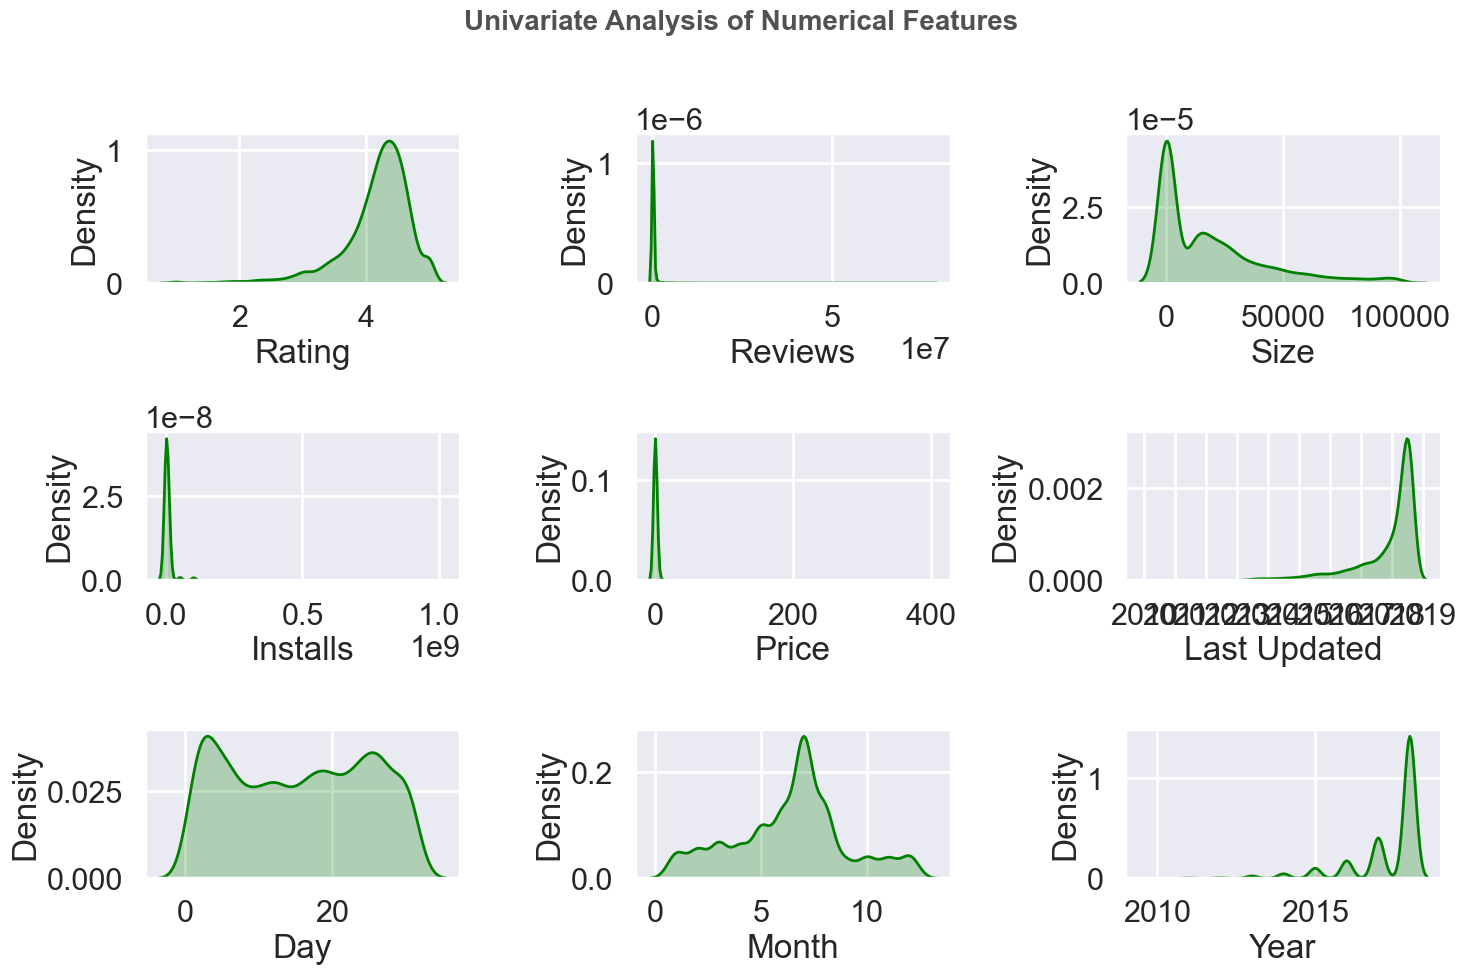

In [ ]:
# Set figure size and overall title
plt.figure(figsize=(15, 15))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1)

# Loop through each numerical feature and plot its distribution
for i, feature in enumerate(numeric_features):
    plt.subplot(5, 3, i + 1)  # Create a subplot grid of 5 rows and 3 columns
    sns.kdeplot(df_copy[feature], shade=True, color='green')  # Plot kernel density estimate (smoothed histogram)
    plt.xlabel(feature)  # Label x-axis with feature name

plt.tight_layout()  # Adjust subplots to prevent overlap
plt.show()  # Display all the plots


## Observations
- Rating and Year is left skewed while Reviews,Size,Installs and Price are right skewed

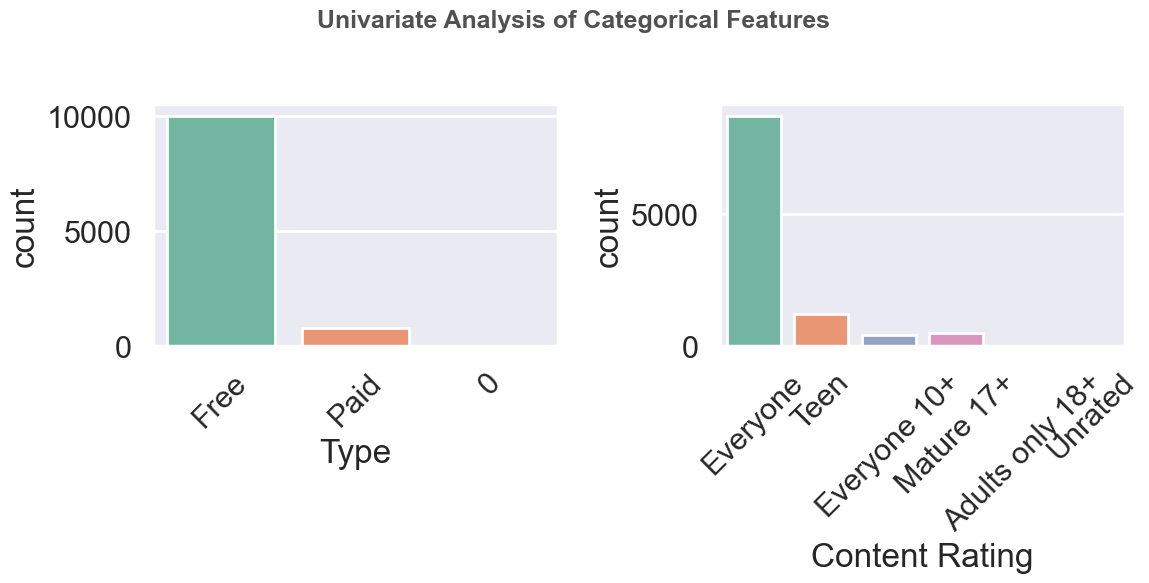

In [237]:
# List of categorical columns to analyze
category = ['Type', 'Content Rating']

# Set up the figure size and title
plt.figure(figsize=(12, 6))
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=18, fontweight='bold', alpha=0.8, y=1)

# Loop through each categorical column and plot countplot
for i, col in enumerate(category):
    plt.subplot(1, 2, i + 1)  # 1 row, 2 columns, current plot position
    sns.countplot(x=df[col], palette="Set2")  # Bar plot showing count of each category
    plt.xlabel(col)  # Label x-axis
    plt.xticks(rotation=45)  # Rotate x labels for better readability

plt.tight_layout()  # Adjust layout to avoid overlap
plt.show()


## Which is the most popular app category?

In [238]:
# Count how many apps are in each category
category_counts = df_copy['Category'].value_counts()

# Display the most popular category and its count
most_popular_category = category_counts.idxmax()
most_popular_count = category_counts.max()

print(f"The most popular app category is '{most_popular_category}' with {most_popular_count} apps.")


The most popular app category is 'FAMILY' with 1832 apps.


In [239]:
df_copy.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Day,Month,Year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,7,1,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,15,1,2018


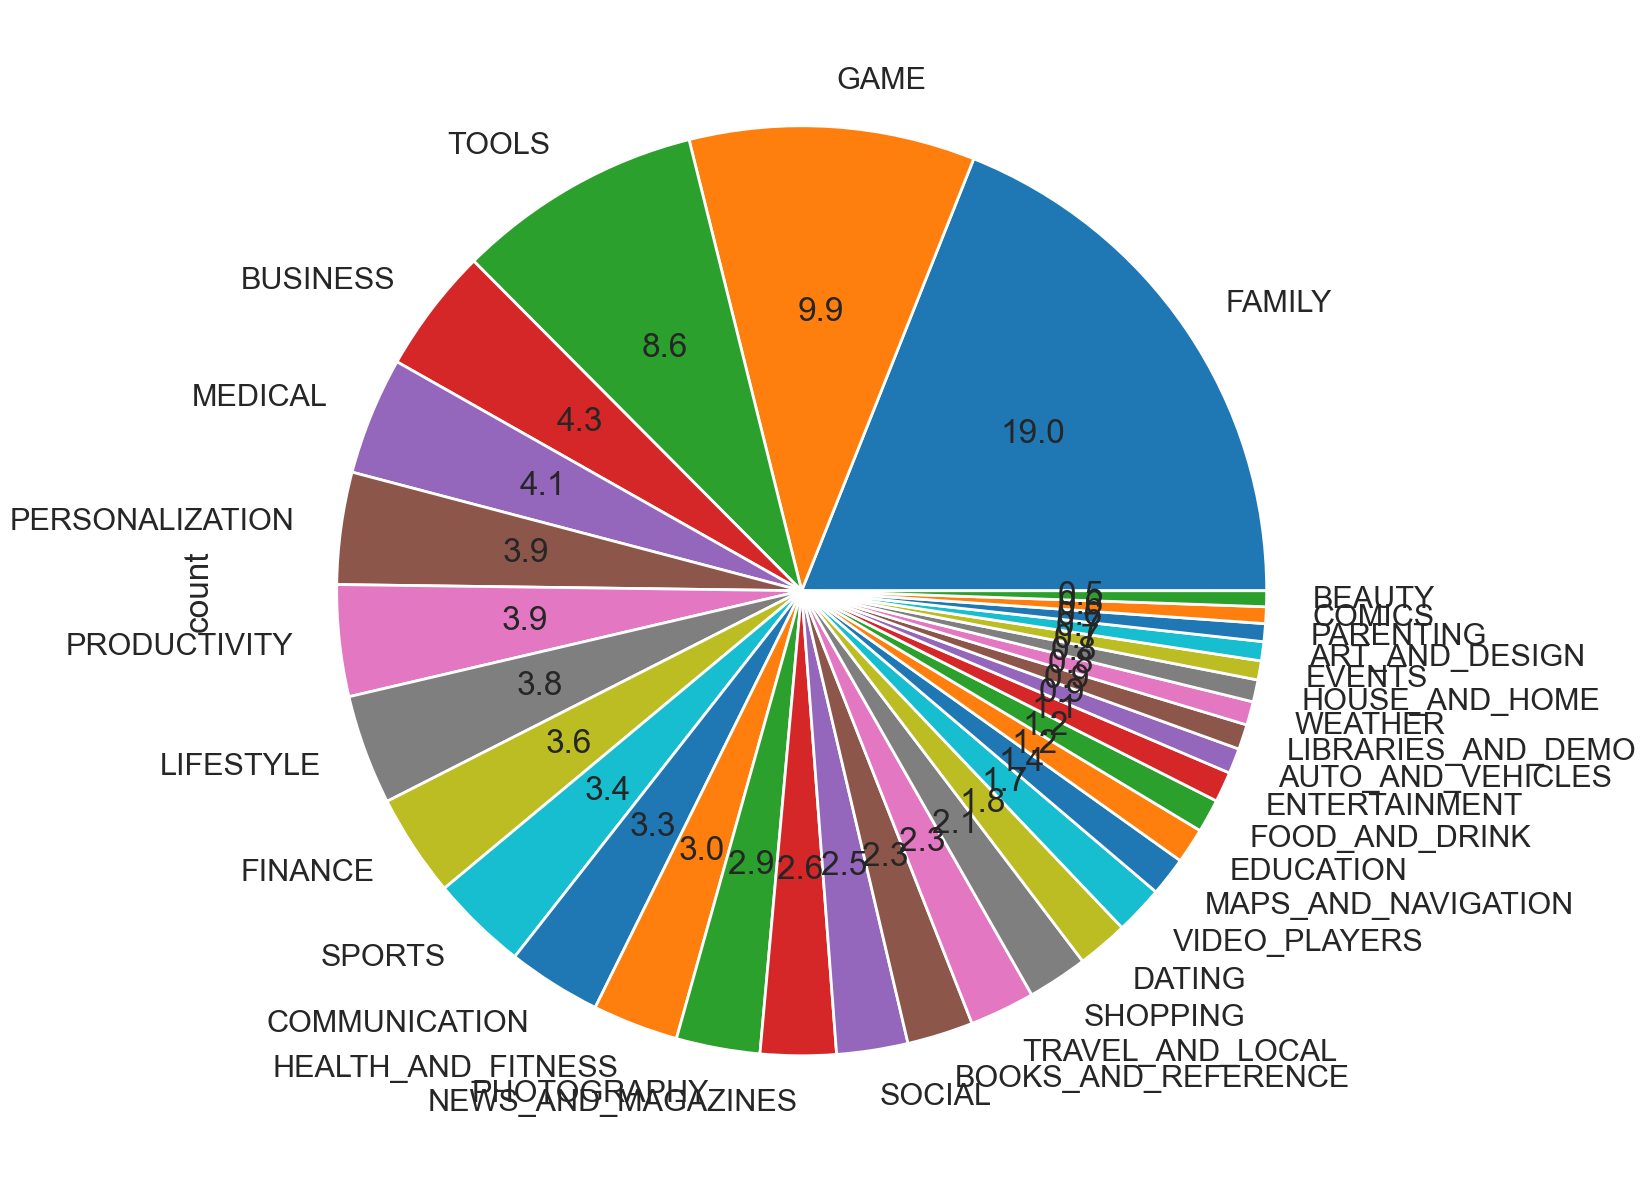

In [240]:
df_copy['Category'].value_counts().plot.pie(y=df_copy['Category'],figsize=(15,16),autopct='%1.1f')
plt.show()



## Observations

1. There are more kinds of apps in playstore which are under category of family, games & tools
2. Beatuty,comics,arts and weather kinds of apps are very less in playstore

In [241]:
## Top 10 App Categories
category = pd.DataFrame(df_copy['Category'].value_counts())        #Dataframe of apps on the basis of category
category.rename(columns = {'Category':'Count'},inplace=True)

In [242]:
category

,count
Category,
FAMILY,1832
GAME,959
TOOLS,827
BUSINESS,420
MEDICAL,395
PERSONALIZATION,376
PRODUCTIVITY,374
LIFESTYLE,369
FINANCE,345


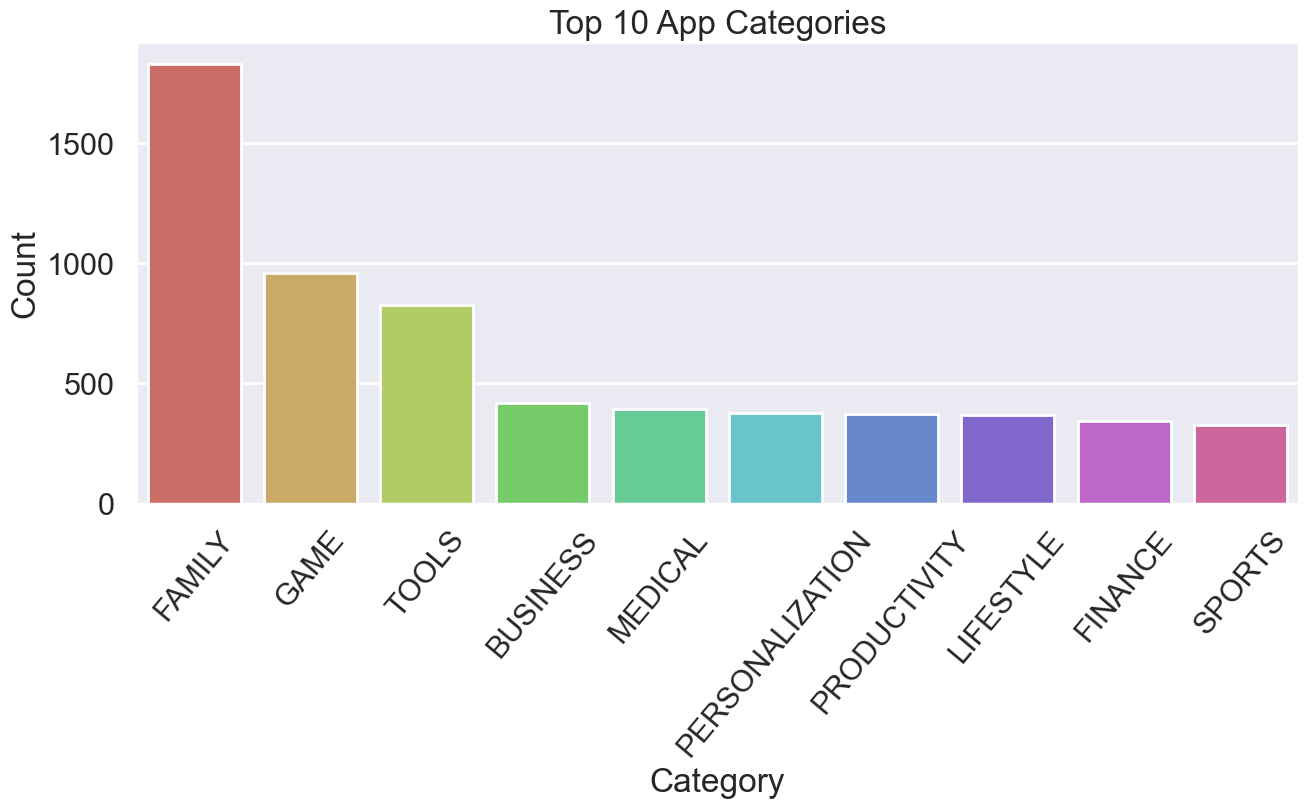

In [243]:
# Count the number of apps in each category
category = df_copy['Category'].value_counts().reset_index()
category.columns = ['Category', 'Count']  # Rename columns

# Plot the top 10 app categories
plt.figure(figsize=(15, 6))
sns.barplot(x='Category', y='Count', data=category[:10], palette='hls')
plt.title('Top 10 App Categories')
plt.xticks(rotation=50)
plt.show()


## Insights
1. Family category has the most number of apps with 18% of apps belonging to it, followed by Games category which has 11% of the apps.
2. Least number of apps belong to the Beauty category with less than 1% of the total apps belonging to it.

## Internal Assignments
1. Which Category has largest number of installations??
2. What are the Top 5 most installed Apps in Each popular Categories ??
3. How many apps are there on Google Play Store which get 5 ratings??

## Which Category has largest number of installations??

In [244]:
# Step 1: Group by Category and sum installs
install_counts = df_copy.groupby('Category')['Installs'].sum().sort_values(ascending=False)

# Step 2: Show the top category
top_category = install_counts.idxmax()
top_installs = install_counts.max()

print(f"The category with the highest number of installations is '{top_category}' with {top_installs:,} installs.")


The category with the highest number of installations is 'GAME' with 13,878,924,415 installs.


## Insights
1. Out of all the categories "GAME" has the most number of Installations.
2. With almost 35 Billion Installations GAME is the most popular Category in Google App store

## What are the Top 5 most installed Apps in Each popular Categories ??

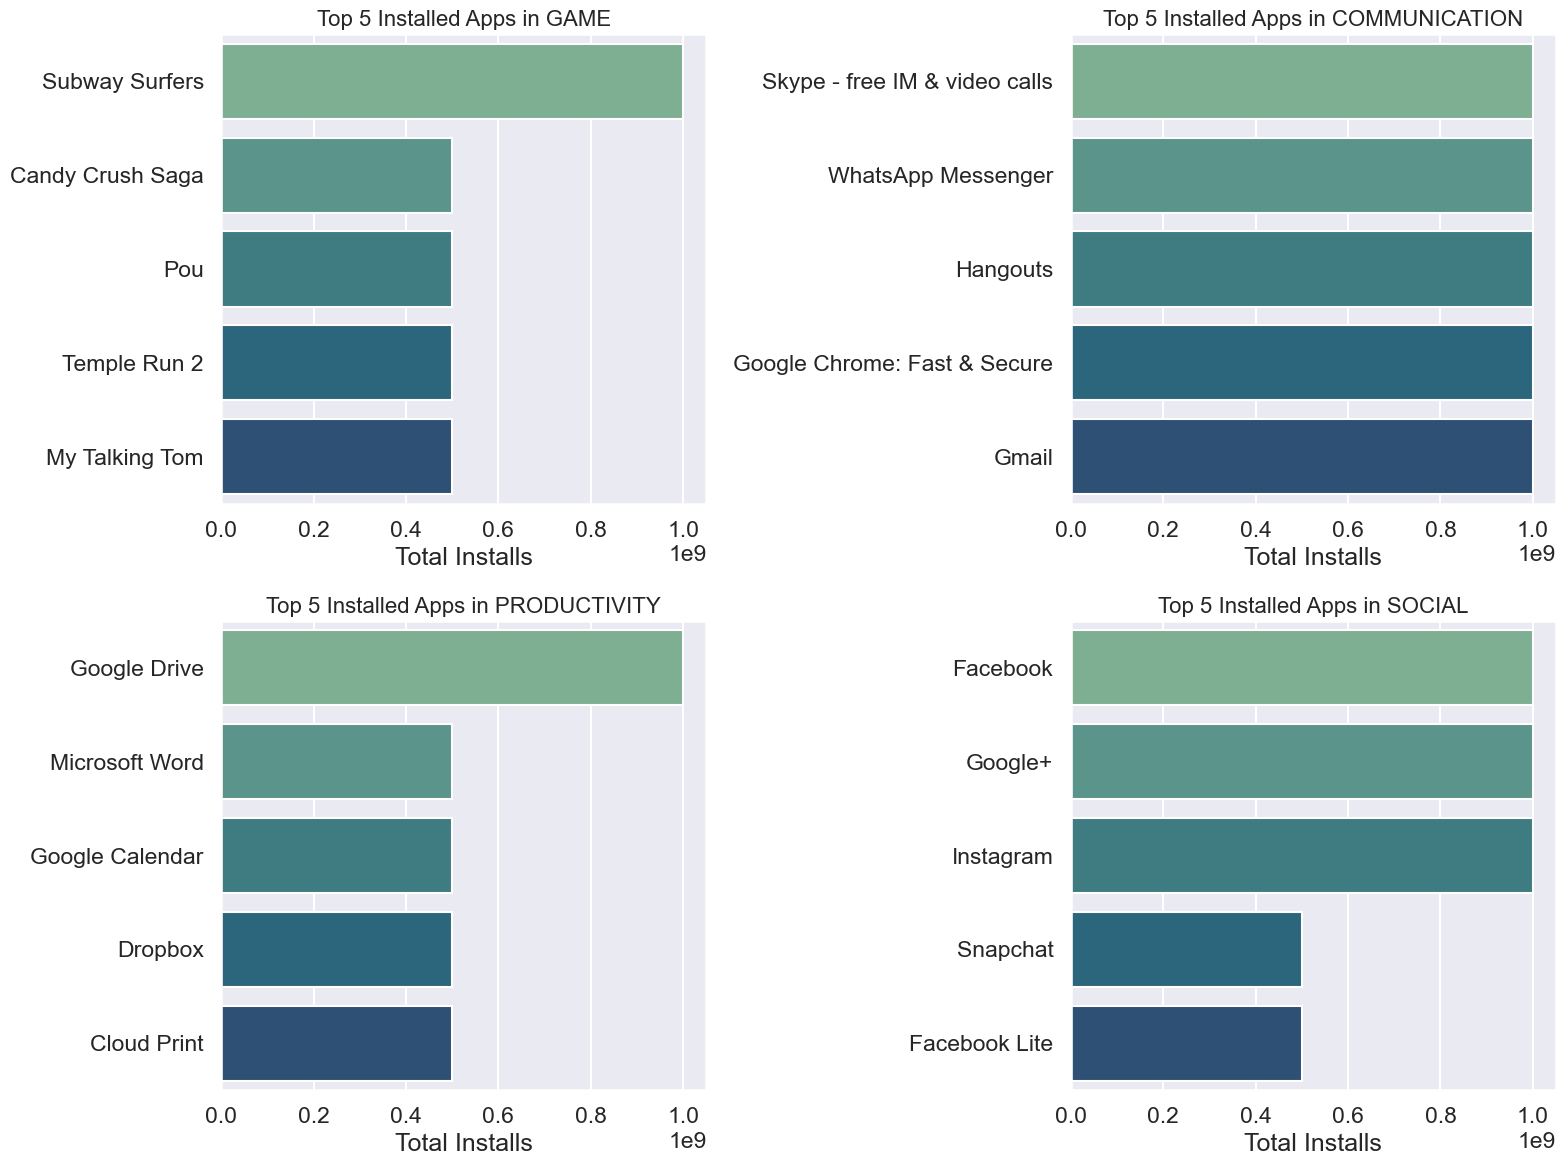

In [248]:
# Step 1: Group by Category and App, and sum installs
dfa = df_copy.groupby(['Category', 'App'])['Installs'].sum().reset_index()

# Step 2: Sort by installs in descending order
dfa = dfa.sort_values('Installs', ascending=False)

# Step 3: List of categories you want to analyze
selected_categories = ['GAME', 'COMMUNICATION', 'PRODUCTIVITY', 'SOCIAL']

# Step 4: Set plot style
sns.set_context("talk")  # Slightly smaller than poster for readability
sns.set_style("darkgrid")

# Step 5: Create figure
plt.figure(figsize=(16, 12))

# Step 6: Loop through each category and plot top 5 apps
for i, category in enumerate(selected_categories):
    top_apps = dfa[dfa['Category'] == category].head(5)

    plt.subplot(2, 2, i + 1)  # 2 rows x 2 columns
    sns.barplot(data=top_apps, x='Installs', y='App', palette='crest')

    plt.title(f'Top 5 Installed Apps in {category}', fontsize=16)
    plt.xlabel('Total Installs')
    plt.ylabel('')

# Step 7: Adjust layout and show plot
plt.tight_layout()
plt.show()


## Insights
- Most popular game is Subway Surfers.
- Most popular communication app is Hangouts.
- Most popular productivity app is Google Drive.
- Most popular social app is Instagram.

## How many apps are there on Google Play Store which get 5 ratings??

In [252]:

five_star_apps = df_copy[df_copy['Rating'] == 5.0]
print(f"Total number of apps with 5-star rating: {five_star_apps.shape[0]}")


Total number of apps with 5-star rating: 271


## Result
- There are 271 five rated apps on Google Play store


In [247]:
df_copy.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Day,Month,Year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,7,1,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,15,1,2018
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,1,8,2018
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,8,6,2018
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,20,6,2018
